**Project Summary:**

Telco customers are leaving for newer companies. Especially phone customers. Find a driver of the churn. A copy of the report will go to executives. Include enough documentation in your final notebook that someone could work through it without you.

**Goals:**
- Find drivers for customer churn at Telco
- Construct a ML classification model that accurately predicts customer churn. 

**Process/Pipeline:**  https://trello.com/b/vOXbVcbl





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acquire
import explore
import prepare
import env
from acquire import get_telco_data
from prepare import train_validate_test_split
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import logistic_regression_util

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import graphviz
from graphviz import Graph

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Acquire the data from the telco_churn database on the Codeup data science database server

df = get_telco_data()


In [3]:

df.value_counts('contract_type_id')

contract_type_id
1    3875
3    1695
2    1473
dtype: int64

In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       payment_type_id  contract_type_id  internet_service_type_id customer_id  \
0                   2                 1                         1  0003-MKNFE   
1                   4                 1                         1  0013-MHZWF   
2                   1                 1                         1  0015-UOCOJ   
3                   1                 1                         1  0023-HGHWL   
4                   3                 1                         1  0032-PGELS   
...               ...               ...                       ...         ...   
7038                4                 3                         3  9950-MTGYX   
7039                2                 3                         3  9953-ZMKSM   
7040                4                 3                         3  9964-WBQDJ   
7041                3                 3                         3  9972-EWRJS   
7042                4                 3                         3 

In [5]:
df.customer_id.nunique()

7043

In [6]:
# df.info()

In [7]:
# df.value_counts('payment_type_id')

In [8]:
# df.value_counts('contract_type_id')

In [9]:
# df.value_counts('internet_service_type_id')

In [10]:
# obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
# for col in obj_cols:
#     print(df[col].value_counts())
#     print(df[col].value_counts(normalize=True, dropna=False))
#     print('----------------------')

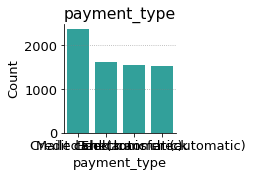

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                 Credit card (automatic)   1612    22.89
Bank transfer (automatic)           Electronic check   1544    21.92
Credit card (automatic)    Bank transfer (automatic)   1522    21.61
_________________________________________________________________


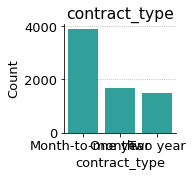

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


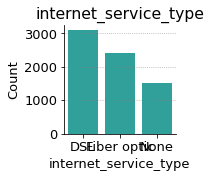

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


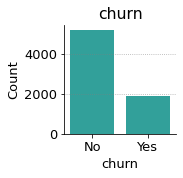

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


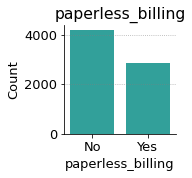

    paperless_billing  Count  Percent
Yes                No   4171    59.22
No                Yes   2872    40.78
_________________________________________________________________


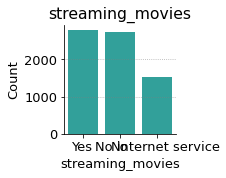

                        streaming_movies  Count  Percent
No                                   Yes   2785    39.54
Yes                                   No   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


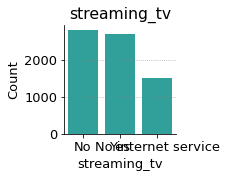

                            streaming_tv  Count  Percent
No                                    No   2810    39.90
Yes                                  Yes   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


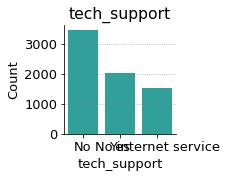

                            tech_support  Count  Percent
No                                    No   3473    49.31
Yes                                  Yes   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


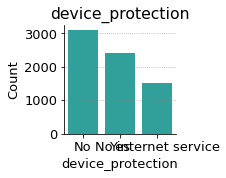

                       device_protection  Count  Percent
No                                    No   3095    43.94
Yes                                  Yes   2422    34.39
No internet service  No internet service   1526    21.67
_________________________________________________________________


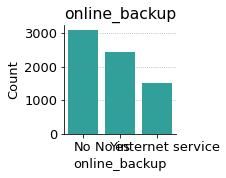

                           online_backup  Count  Percent
No                                    No   3088    43.84
Yes                                  Yes   2429    34.49
No internet service  No internet service   1526    21.67
_________________________________________________________________


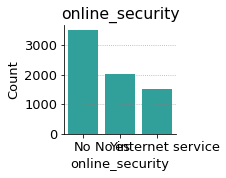

                         online_security  Count  Percent
No                                    No   3498    49.67
Yes                                  Yes   2019    28.67
No internet service  No internet service   1526    21.67
_________________________________________________________________


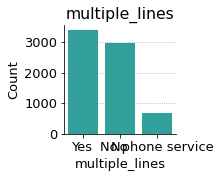

                    multiple_lines  Count  Percent
No                             Yes   3390    48.13
Yes                             No   2971    42.18
No phone service  No phone service    682     9.68
_________________________________________________________________


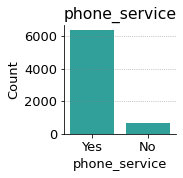

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


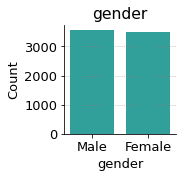

        gender  Count  Percent
Male      Male   3555    50.48
Female  Female   3488    49.52
_________________________________________________________________


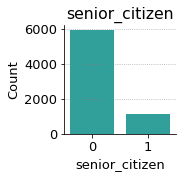

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


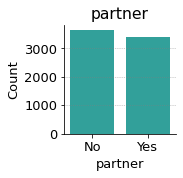

    partner  Count  Percent
No       No   3641     51.7
Yes     Yes   3402     48.3
_________________________________________________________________


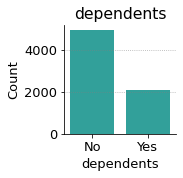

    dependents  Count  Percent
No          No   4933    70.04
Yes        Yes   2110    29.96
_________________________________________________________________


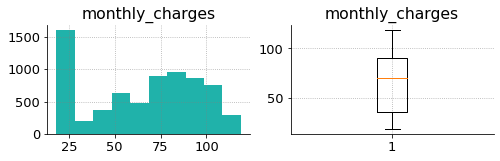

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


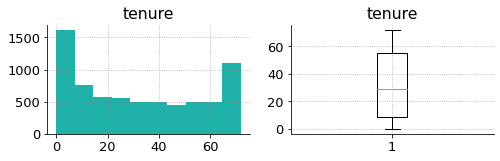

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


In [11]:
# Visualizations of individual columns
cat_vars = ['payment_type','contract_type','internet_service_type','churn',
            'paperless_billing','streaming_movies','streaming_tv','tech_support',
            'device_protection','online_backup','online_security','multiple_lines',
            'phone_service', 'gender','senior_citizen','partner','dependents']
quant_vars = ['monthly_charges','tenure']
explore.explore_univariate(df, cat_vars, quant_vars)

##  Takeaways:
45% of all customers use some sort of automatic payments
55% of all customers are on MTM contracts
44% of all customers have dsl internet
27% of all customers have churned
90% of all customers have phone service
19% of all customers are senior citizens

## Takeaways for Prep: 
Handle missing values:
- total_charges has 11 missing values
- these missing values are customers with zero tenure, so can replace with zero

Duplicate information (delete these columns): 
- payment_type, contract_type, internet_service_type 

Create dummies for:
- gender

Change data type:
- total_charges is object and should be changed to float64

Encode (yes/no columns):
- churn, paperless_billing
    
Categorical that are dtype 'object' (need to be encoded):
- partner, dependants, 
- online_security, online_backup, device_protection, tech_support

'Merge' columns: 
- phone_service will include multi-line serve
- Streaming - will be encoded for streaming tvs and streaming movies


In [12]:
telco_churn = prepare.clean_telco(df)
telco_churn.head()


,customer_id,senior_citizen,tenure_months,paperless_billing,monthly_charges,total_charges,tenure_years,phone_services,gender_Female,gender_Male,...,e_Check,sends_check,has_auto_pay,dsl,fiber,no_internet,no_tech_support,no_online_security,no_online_backup,no_device_protection
0,0003-MKNFE,0,9,0,59.9,542.40,0.75,2,0,1,...,0,1,0,1,0,0,1,1,1,1
1,0013-MHZWF,0,9,1,69.4,571.45,0.75,1,1,0,...,0,0,1,1,0,0,0,1,1,1
2,0015-UOCOJ,1,7,1,48.2,340.35,0.58,1,1,0,...,1,0,0,1,0,0,1,0,1,1
3,0023-HGHWL,1,1,1,25.1,25.10,0.08,0,0,1,...,1,0,0,1,0,0,1,1,1,1
4,0032-PGELS,0,1,0,30.5,30.50,0.08,0,1,0,...,0,0,1,1,0,0,1,0,1,1


In [13]:
telco_churn.shape

(7043, 29)

In [14]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           7043 non-null   object 
 1   senior_citizen        7043 non-null   int64  
 2   tenure_months         7043 non-null   int64  
 3   paperless_billing     7043 non-null   int64  
 4   monthly_charges       7043 non-null   float64
 5   total_charges         7032 non-null   float64
 6   tenure_years          7043 non-null   float64
 7   phone_services        7043 non-null   int64  
 8   gender_Female         7043 non-null   uint8  
 9   gender_Male           7043 non-null   uint8  
 10  streamer              7043 non-null   int64  
 11  has_churned           7043 non-null   int64  
 12  is_single_no_dep      7043 non-null   int64  
 13  has_partner_no_dep    7043 non-null   int64  
 14  is_single_with_dep    7043 non-null   int64  
 15  family               

In [15]:
 train, validate, test = train_validate_test_split(telco_churn)

In [16]:
# # Visualizations of individual columns of TRAIN data
# cat_vars = ['auto_pay', 'e_Check', 'check','month_to_month', 'one_year', 'two_year','dsl','fiber','no_internet','churn',
#             'paperless_billing','streamer','no_tech_support', 'no_device_protection','no_online_backup','no_online_security',
#             'phone_services', 'gender_Female', 'gender_Male','senior_citizen','single','partner_no_dep','single_with_dep', 'family']
# quant_vars = ['monthly_charges','tenure_months','tenure_years']
# explore.explore_univariate(train, cat_vars, quant_vars)

In [17]:
# cat_vars = ['auto_pay', 'e_Check', 'check','month_to_month', 'one_year', 'two_year','dsl','fiber','no_internet','churn',
#             'paperless_billing','streamer','no_tech_support', 'no_device_protection','no_online_backup','no_online_security',
#             'phone_services', 'gender_Female', 'gender_Male','senior_citizen','single','partner_no_dep','single_with_dep', 'family']
# quant_vars = ['monthly_charges','tenure_months','tenure_years']

# explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

In [18]:
# cat_vars = ['auto_pay', 'e_Check', 'check']
# quant_vars = ['monthly_charges','tenure_months','tenure_years']

# explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

## Takeaways for Explore:

Customers not on some type of auto pay churn more
    - customers on auto pay churn less

Customers on fiber churn more

Customers without streaming services churn more

Customers without tech support churn more

-  I will compare proporations of those who churned and those who didn't with other categorical variables to compare churn rate -- 
- Use a chi-square test to see if ___________ was more likey to churn than __________
- Use a Mann-Whitney test to compare the mean of monthly charges of those who churned and those who didn't





In [19]:
# target = 'churn'
# # cat_vars = ['auto_pay', 'e_Check', 'check','month_to_month', 'one_year', 'two_year','dsl','fiber','no_internet','churn',
# #             'paperless_billing','streaming_movies_No', 'streaming_movies_Yes', 'streaming_movies_No internet service','streaming_tv_No', 'streaming_tv_Yes', 'streaming_tv_No internet service','tech_support',
# #             'device_protection','online_backup','online_security',
# #             'phone_services', 'gender_Female', 'gender_Male','senior_citizen','single','partner_no_dep','single_with_dep', 'family']
# cat_vars = ['auto_pay', 'e_Check', 'check']
# quant_vars = ['monthly_charges']

# explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [20]:
train.head(5).T

,5710,4465,5017,3521,3828
customer_id,6013-BHCAW,0409-WTMPL,1085-LDWAM,3039-MJSLN,9046-JBFWA
senior_citizen,0,0,0,0,0
tenure_months,61,58,69,3,27
paperless_billing,1,1,1,0,0
monthly_charges,81,110.65,20.35,20.2,19.15
total_charges,4976.15,6526.65,1442.65,50.6,537.35
tenure_years,5.08,4.83,5.75,0.25,2.25
phone_services,2,2,1,1,1
gender_Female,0,1,1,0,0
gender_Male,1,0,0,1,1


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5710 to 6867
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           3943 non-null   object 
 1   senior_citizen        3943 non-null   int64  
 2   tenure_months         3943 non-null   int64  
 3   paperless_billing     3943 non-null   int64  
 4   monthly_charges       3943 non-null   float64
 5   total_charges         3934 non-null   float64
 6   tenure_years          3943 non-null   float64
 7   phone_services        3943 non-null   int64  
 8   gender_Female         3943 non-null   uint8  
 9   gender_Male           3943 non-null   uint8  
 10  streamer              3943 non-null   int64  
 11  has_churned           3943 non-null   int64  
 12  is_single_no_dep      3943 non-null   int64  
 13  has_partner_no_dep    3943 non-null   int64  
 14  is_single_with_dep    3943 non-null   int64  
 15  family            

## Hypotheses Testing: 
    
Does whether a customer has tech support affect whether they will churn?
H0: Churn is independent of tech support. 
Alternative: They are dependent    


In [23]:
#crosstab for tech support and churn
observed = pd.crosstab(telco_churn['has_churned'],telco_churn['no_tech_support'])
observed

no_tech_support,0,1
has_churned,,
0,3147,2027
1,423,1446


In [24]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 6.35740755126359e-176

chi2 = 799.6724332372228

Since p < .05, we reject the null hypothesis.


## Hypothesis Test #2

Does having streaming affect whether customers will churn?
H0: Churn is independent of streaming services. 
Alternative: They are dependent.


In [26]:
#crosstab for auto_pay and churn
observed_2 = pd.crosstab(telco_churn['has_churned'],telco_churn['streamer'])
observed_2

streamer,0,1
has_churned,,
0,2736,2438
1,808,1061


In [27]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_2)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 1.0541667201283859e-12

chi2 = 50.740591762430526

Since p < .05, we reject the null hypothesis.


## Hypothesis Test #3

Does having auto pay affect whether customers will churn?
H0: Churn is independent of auto_pay. 
Alternative: They are dependent.


In [28]:
#crosstab for auto_pay and churn
observed_3 = pd.crosstab(telco_churn['has_churned'],telco_churn['has_auto_pay'])
observed_3

has_auto_pay,0,1
has_churned,,
0,2598,2576
1,1379,490


In [29]:
# Set our alpha
alpha = .01

#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_3)

print(f'p-value is: {p}')
print()
print(f'chi2 = {chi2}')
print()
if p < alpha:
    print("Since p < .05, we reject the null hypothesis.")
else:
    print("We fail to reject the null")

p-value is: 3.0278725722860343e-69

chi2 = 309.3485572016954

Since p < .05, we reject the null hypothesis.


### Splitting Data for Modeling

In [32]:
# Splitting out target variable from X_train

features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
target = ['has_churned']

X_train = train.drop(columns = ['has_churned', 'total_charges', 'customer_id'],axis=1)
X_validate = validate.drop(columns = ['has_churned', 'total_charges', 'customer_id'],axis=1)
X_test = test.drop(columns = ['has_churned', 'total_charges', 'customer_id'],axis=1)

# Establishing target as y_train
y_train = train.has_churned
y_validate = validate.has_churned
y_test = test.has_churned

### Establish a Baseline Accuracy to determine if having a model is better than no model.

In [33]:
y_train.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

In [34]:
baseline = pd.DataFrame(y_train)
baseline['baseline'] = 0

baseline.columns = ['actual','baseline']
baseline.head()

,actual,baseline
5710,0,0
4465,0,0
5017,0,0
3521,0,0
3828,0,0


In [35]:
# cross tab of our baseline versus actual
pd.crosstab(baseline['baseline'], baseline['actual'])

actual,0,1
baseline,,
0,2897,1046


In [36]:
# let's calculate the accuracy
# positive will be not churned
# (TP + TN) / (TP + TN + FP + FN)

#predicting not churned and the customer has not churned
TP = 2897

#predicting not churned and the customer has churned
FP = 1046

#predicting the customer has churned and they have churned
TN = 0

#predicting the customer has churned and they have not churned
FN = 0

base_acc = (TP + TN) / (TP + TN + FP + FN)

print("The baseline accuracy is",round(base_acc * 100, 2),"percent.")

The baseline accuracy is 73.47 percent.


## Logistic Regression Models

#### LR Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Logistic Regression classifier on training set: 77%
- Baseline = 73%




In [40]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the target and features we're using
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
target = ['has_churned']

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(base_acc, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.77


In [41]:
# make prediction
y_pred = logit.predict(X_train[features])

In [42]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2897
           1       0.58      0.50      0.54      1046

    accuracy                           0.77      3943
   macro avg       0.71      0.69      0.70      3943
weighted avg       0.76      0.77      0.77      3943



#### Model 2

- features = ['no_tech_support', 'has_auto_pay','month_to_month','fiber']
- target = ['has_churned']
- Accuracy of Logistic Regression classifier on training set: 78%
- Baseline = 73%




In [43]:
# Create the logistic regression
logit2 = LogisticRegression(random_state=123)

# specify the target and features we're using
features2 = ['no_tech_support', 'has_auto_pay','month_to_month','fiber']
target = ['has_churned']

# Fit a model using only these specified features
logit2.fit(X_train[features2], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred2 = logit2.predict(X_train[features2])

print("Baseline is", round(base_acc, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train[features2], y_train)))


Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.78


In [44]:
# make prediction
y_pred2 = logit2.predict(X_train[features2])

In [45]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2897
           1       0.61      0.43      0.50      1046

    accuracy                           0.78      3943
   macro avg       0.71      0.67      0.68      3943
weighted avg       0.76      0.78      0.76      3943



## Decision Tree

#### DT Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of Decision Tree classifier on training set: 77%
- Baseline = 73%



In [46]:
# Generate a blank, decision tree model
clf1 = DecisionTreeClassifier(max_depth=3)

#Specify the features
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

# Train(fit) the model
dt1 = clf1.fit(X_train[features], y_train)
dt1

DecisionTreeClassifier(max_depth=3)

In [47]:
# Visualize the model so it can explain itself!
dot_data = export_graphviz(clf1, feature_names= features, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)

'churn_decision_tree.pdf'

In [48]:
y_pred3 = clf1.predict(X_train[features])
y_pred3_proba = clf1.predict_proba(X_train[features])

#evaluate metrics
print('Accuracy of model with all features:', clf1.score(X_train[features], y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

Accuracy of model with all features: 0.7740299264519401

The confusion matrix:
 [[2522  375]
 [ 519  527]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2897
           1       0.58      0.50      0.54      1046

    accuracy                           0.77      3943
   macro avg       0.71      0.69      0.70      3943
weighted avg       0.76      0.77      0.77      3943



In [49]:
# Model score on accuracy:
accuracy = clf1.score(X_train[features],y_train)
accuracy

0.7740299264519401

## K-Nearest Neighbor

#### KNN Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of KNN on training set: 74% 
- Baseline = 73%



In [55]:
#making the model
knn = KNeighborsClassifier()

In [56]:
#Specify the features
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

#train/fit the model

knn_fit = knn.fit(X_train[features], y_train)

In [57]:
# evaluating the model
y_pred = knn.predict(X_train[features])

In [58]:
# check model accuracy
accuracy = knn.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.759


In [59]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2897
           1       0.58      0.34      0.43      1046

    accuracy                           0.76      3943
   macro avg       0.68      0.63      0.64      3943
weighted avg       0.74      0.76      0.74      3943



#### KNN Model 2
- k = 20
- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['has_churned']
- Accuracy of KNN on training set: 74% 
- Baseline = 73%



In [60]:
#making the model
k = 20
knn_20 = KNeighborsClassifier(n_neighbors=k)


In [61]:
#Specify the features
features20 = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

#train/fit the model

knn_20_fit = knn_20.fit(X_train[features20], y_train)

In [62]:
# evaluating the model
y_pred_20 = knn_20_fit.predict(X_train[features20])

In [63]:
# check model accuracy
accuracy_20 = knn_20_fit.score(X_train[features20], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.759


In [64]:
# Classification metrics report
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2897
           1       0.58      0.34      0.43      1046

    accuracy                           0.76      3943
   macro avg       0.68      0.63      0.64      3943
weighted avg       0.74      0.76      0.74      3943



### Run best performing model on out-of-sample data (Validate)

#### LR Model 1

- features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
- target = ['churn']
- Accuracy of Logistic Regression Classifier on training set: 77%
- Accuracy of Logistic Regression Classifier on validate set: 78%
- Baseline = 73%




In [65]:
# specify the target and features we're using
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

# Make prediction for validate dataset
y_pred_validate = logit.predict(X_validate[features])


print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate[features], y_validate)))

print(confusion_matrix(y_validate, y_pred_validate))

print(classification_report(y_validate, y_pred_validate))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.77
[[1078  164]
 [ 219  230]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1242
           1       0.58      0.51      0.55       449

    accuracy                           0.77      1691
   macro avg       0.71      0.69      0.70      1691
weighted avg       0.77      0.77      0.77      1691



Run Best Performing Model on Test
Logistic Regression


In [67]:
#Specify the features
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

y_pred_2 = logit.predict(X_test[features])

print("Test Performance: Logistic Regression")

print('Accuracy: {:.4f}'.format(logit.score(X_test[features], y_test)))

print(confusion_matrix(y_test, y_pred_2))

print(classification_report(y_test, y_pred_2))

Test Performance: Logistic Regression
Accuracy: 0.7835
[[922 113]
 [192 182]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### Conclusion

**My analysis revealed that number of factors are contributing to churn:**
- Lack of technical support
- Customer does not participate in auto-pay
- Customer does not subscribe to streaming services
- Customer is on a month-to-month contract
- Customer has fiber optic internet

**Some recommendations to reduce churn include:** 
- Offering reduced prices on tech support for internet customers.
- Offer packages for streaming movies and tv
- Encourage customers to participate in some for of automatic payment (bank draft or credict card.
- Incentivize 1- and 2-year contracts

**With additional time to work on this project, I will:** 

- Analyze combinations of factors that may be driving churn in fiber optic customers.
- Run additional models, varying the hyperparameters to see if model performance can be improved/more accurate.
- Investigate our pricing structure across various services to identify if our pricing strategy may be suboptimal.

**A .csv file containing a prediction of churn for customers is included for your review.**

In [94]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           7043 non-null   object 
 1   senior_citizen        7043 non-null   int64  
 2   tenure_months         7043 non-null   int64  
 3   paperless_billing     7043 non-null   int64  
 4   monthly_charges       7043 non-null   float64
 5   total_charges         7032 non-null   float64
 6   churn                 7043 non-null   object 
 7   tenure_years          7043 non-null   float64
 8   phone_services        7043 non-null   int64  
 9   gender_Female         7043 non-null   uint8  
 10  gender_Male           7043 non-null   uint8  
 11  streamer              7043 non-null   int64  
 12  has_churned           7043 non-null   int64  
 13  is_single_no_dep      7043 non-null   int64  
 14  has_partner_no_dep    7043 non-null   int64  
 15  is_single_with_dep   

In [68]:
# Features to be used in the model
features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [71]:
# Fit the model 
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [79]:
# Feature Importance
print(rf.feature_importances_)

# Make Predictions
y_pred = rf.predict(X_train[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_train[features])

[0.24035193 0.05178433 0.47898289 0.01450963 0.21437122]


In [80]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2897
           1       0.61      0.43      0.50      1046

    accuracy                           0.78      3943
   macro avg       0.71      0.67      0.68      3943
weighted avg       0.76      0.78      0.76      3943



In [78]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.78
Confusion Matrix:
[[2608  289]
 [ 596  450]]


In [87]:
telco_churn.get_value(index, col, takeable=False)

TypeError: lookup() missing 1 required positional argument: 'col_labels'